In [16]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import auc,roc_auc_score,roc_curve,recall_score,accuracy_score,classification_report

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.00,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,...,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77,0
284803,172787.00,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,...,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79,0
284804,172788.00,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,...,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88,0
284805,172788.00,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,...,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00,0
284806,172792.00,-0.53,-0.19,0.70,-0.51,-0.01,-0.65,1.58,-0.41,0.49,...,0.26,0.64,0.38,0.01,-0.47,-0.82,-0.00,0.01,217.00,0


In [4]:
print(data.shape)
data.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [7]:
data.describe().T # std为标准差

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.00,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


<Axes: >

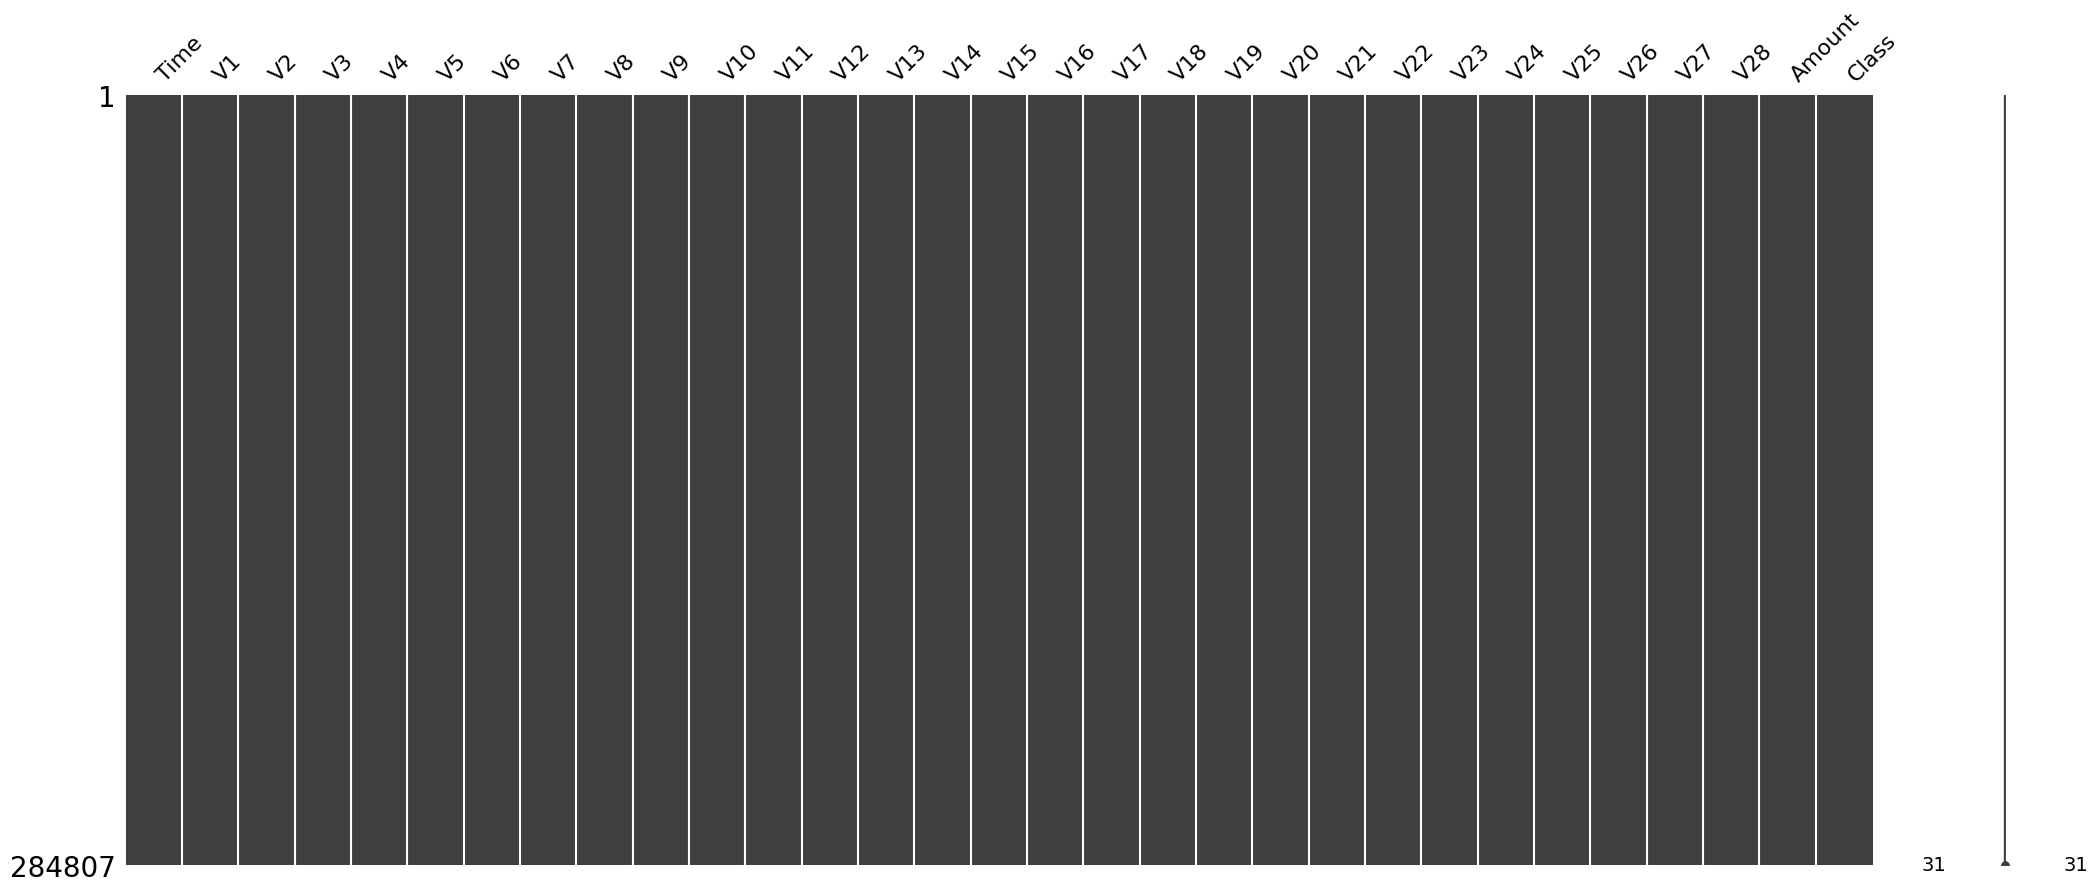

In [8]:
msno.matrix(data)

In [9]:
 data.isnull().sum().sum()

0

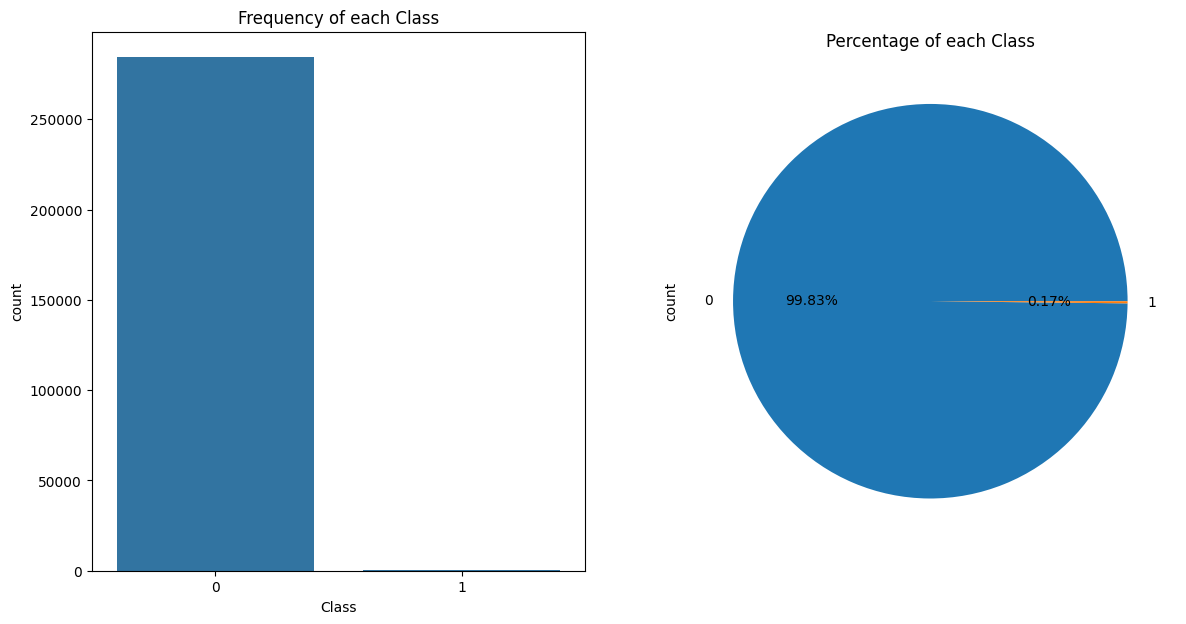

In [13]:
fig,axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x = 'Class',data=data,ax=axs[0])
axs[0].set_title("Frequency of each Class")

data['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

In [14]:
data.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [18]:
data['Hour'] =data["Time"].apply(lambda x : divmod(x, 3600)[0])
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0,0.0000
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0,0.0000
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0,0.0000
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0,0.0000
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,...,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0,47.0000
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,...,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0,47.0000
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,...,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0,47.0000
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,...,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0,47.0000


In [22]:
from matplotlib import colors
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

Text(0.5, 1.0, 'Fraud')

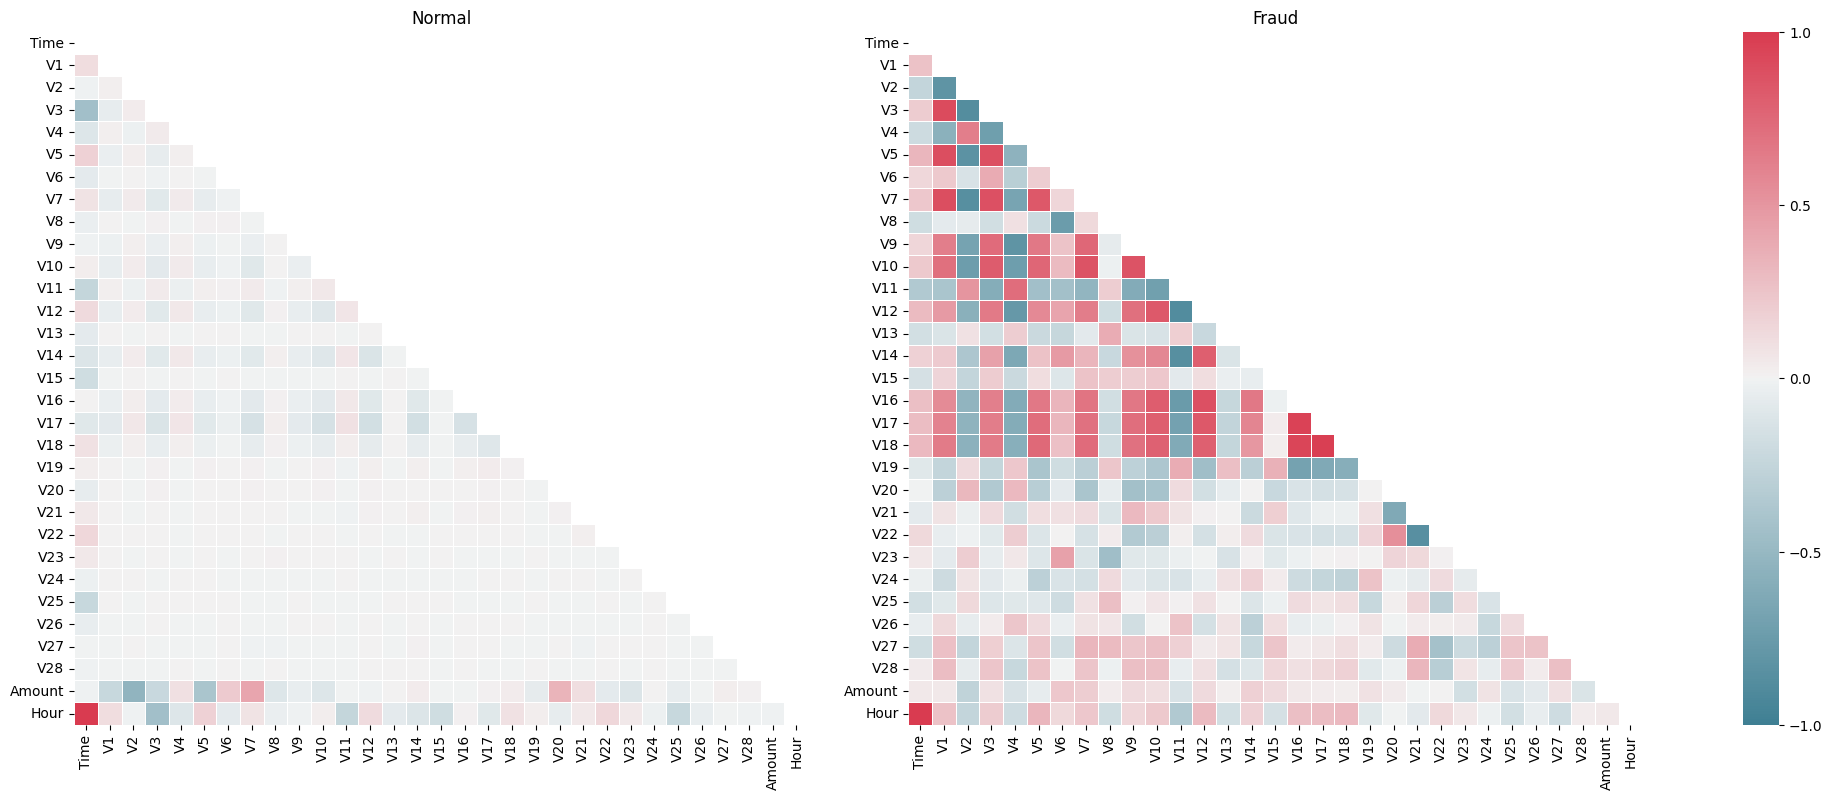

In [23]:
Xfraud = data.loc[data["Class"] == 1]
XnonFraud = data.loc[data["Class"] == 0]
correlationNonFraud = XnonFraud.loc[:, data.columns != 'Class'].corr()
correlationNonFraud

mask = np.zeros_like(correlationNonFraud)
index = np.triu_indices_from(correlationNonFraud)
mask[index] = True

kw = {"width_ratios": [1,1,0.05], "wspace": 0.2}
f, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw=kw, figsize = (22, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, square = False, linewidths = 0.5, mask = mask, cbar = False,cmap=cmap)
ax1.set_title('Normal')

correlationFraud = Xfraud.loc[:, data.columns != 'Class'].corr()
sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = True, cbar_ax = ax3, cbar_kws={'orientation': 'vertical', 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_title('Fraud')

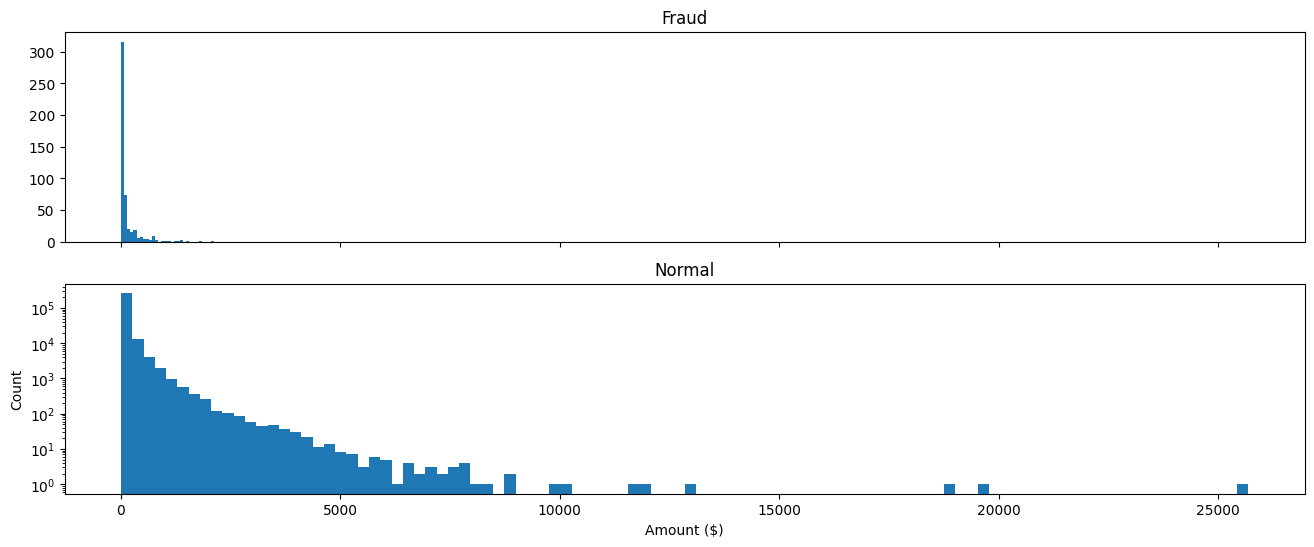

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))
ax1.hist(data["Amount"][data["Class"]== 1], bins = 30)
ax1.set_title('Fraud')

ax2.hist(data["Amount"][data["Class"] == 0], bins = 100)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Count')
plt.yscale('log')

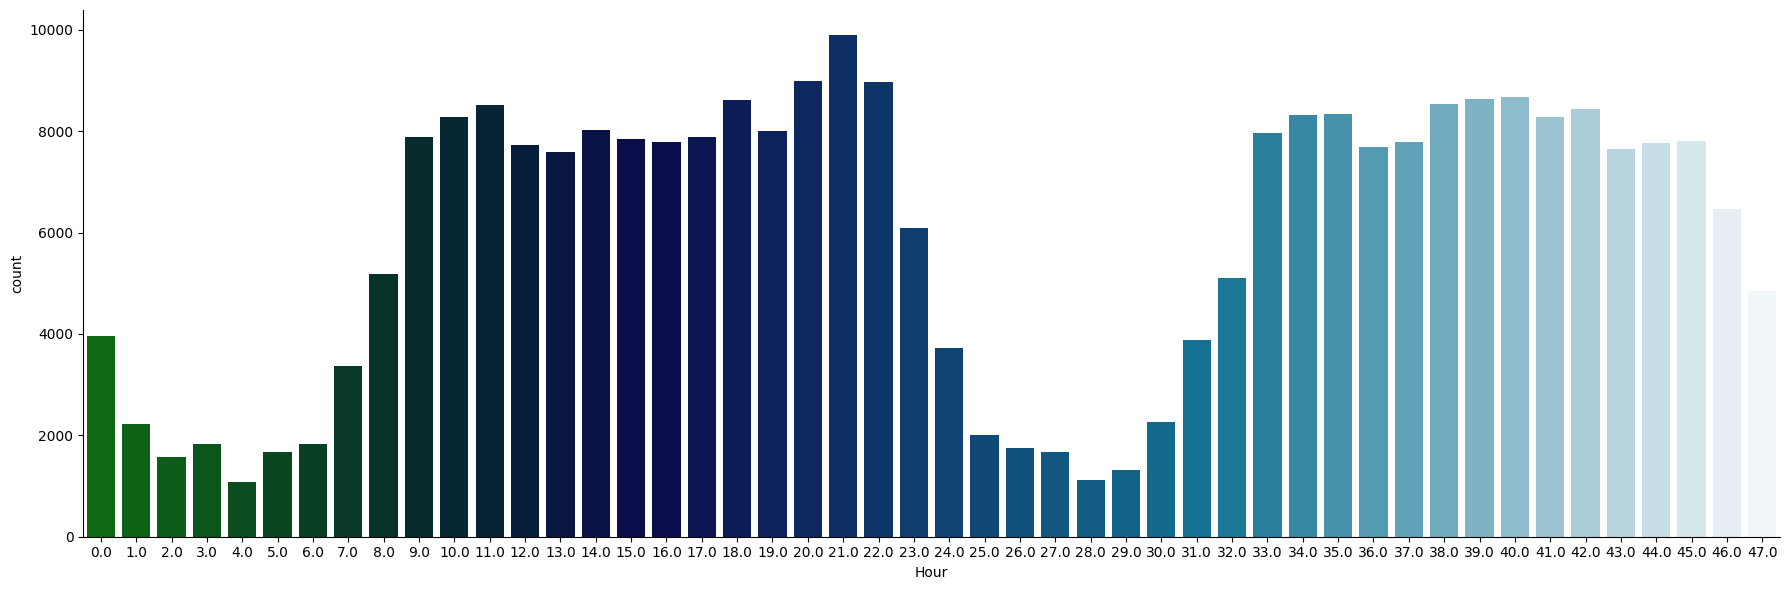

In [27]:
sns.catplot(x="Hour", data=data, kind="count", palette="ocean", height=6, aspect=3)

Text(0.5, 1.0, 'Normal')

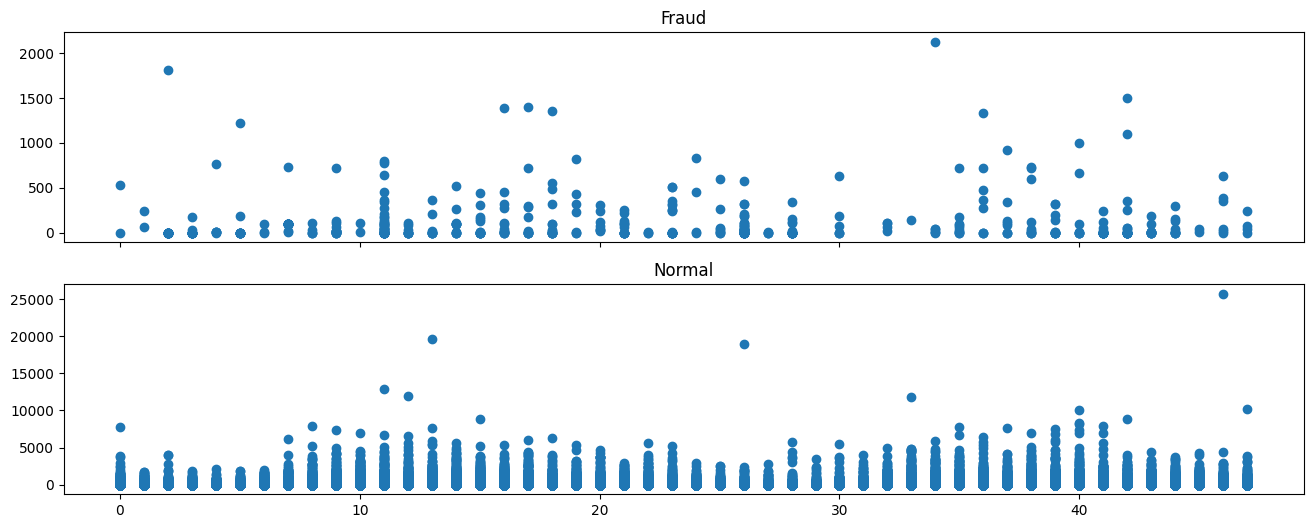

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))
cond1 = data["Class"]== 1
ax1.scatter(data["Hour"][data["Class"] == 1], data["Amount"][cond1])
ax1.set_title('Fraud')

cond2 = data["Class"] == 0
ax2.scatter(data["Hour"][data["Class"] == 0], data["Amount"][cond2])
ax2.set_title('Normal')

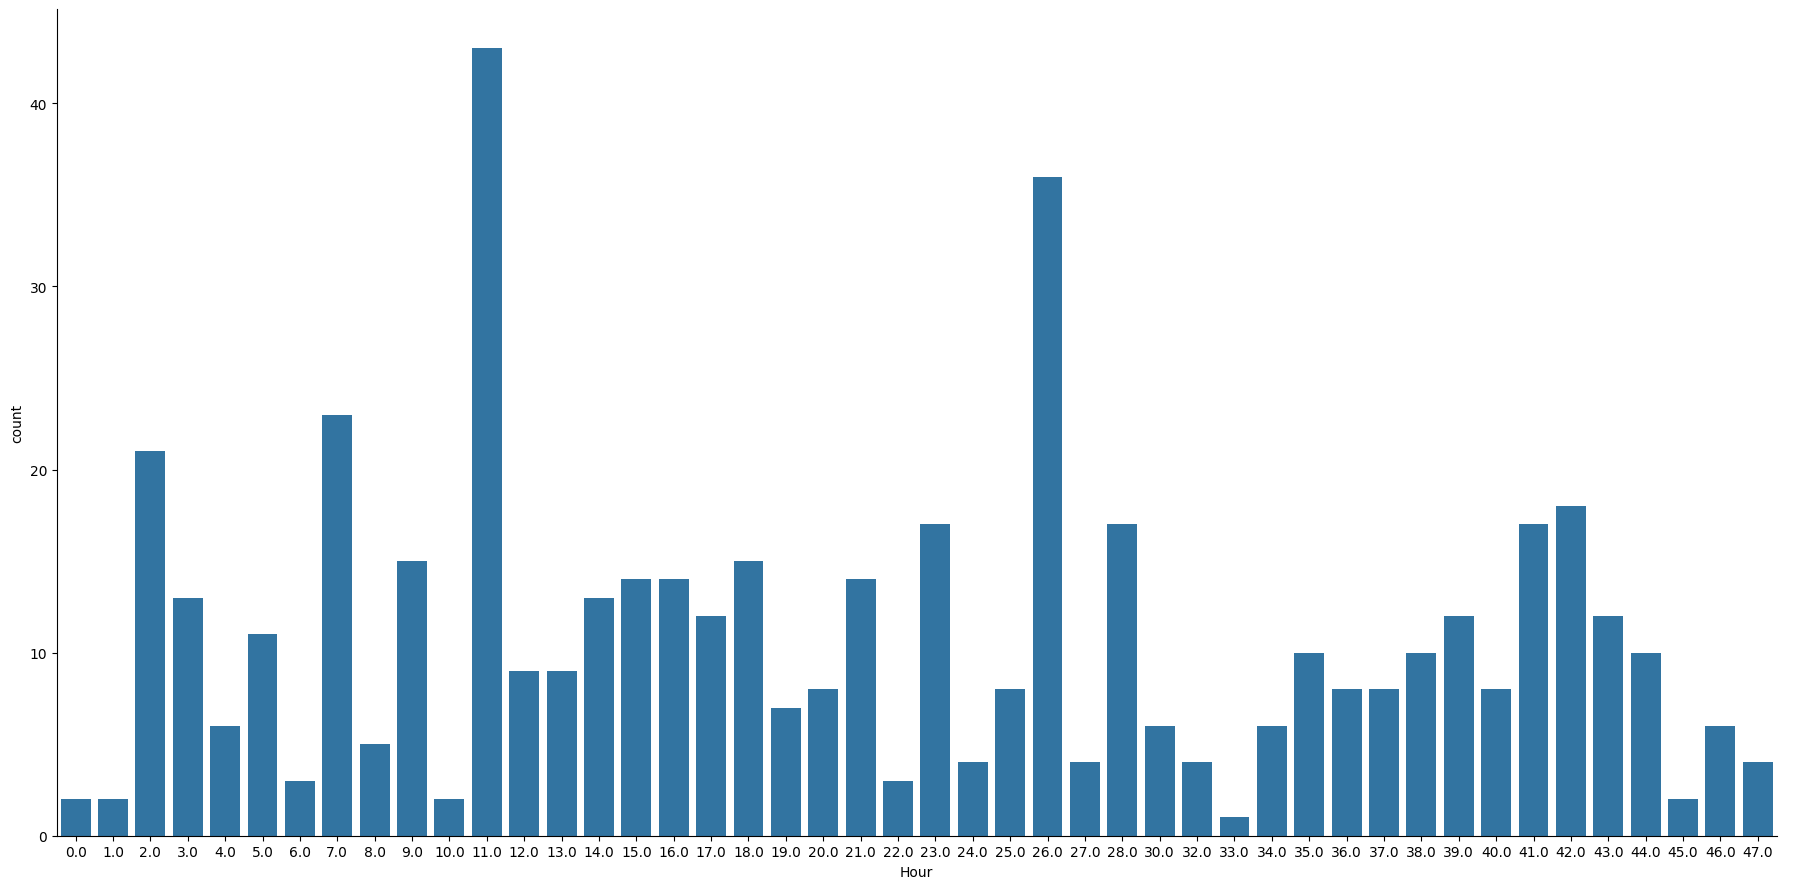

In [29]:
sns.catplot(x="Hour", kind="count", data=data[cond1], height=9, aspect=2)

In [30]:
data["Amount"][cond1].max()

2125.87

In [31]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0,0.0000
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0,0.0000
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0,0.0000
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0,0.0000
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0,0.0000


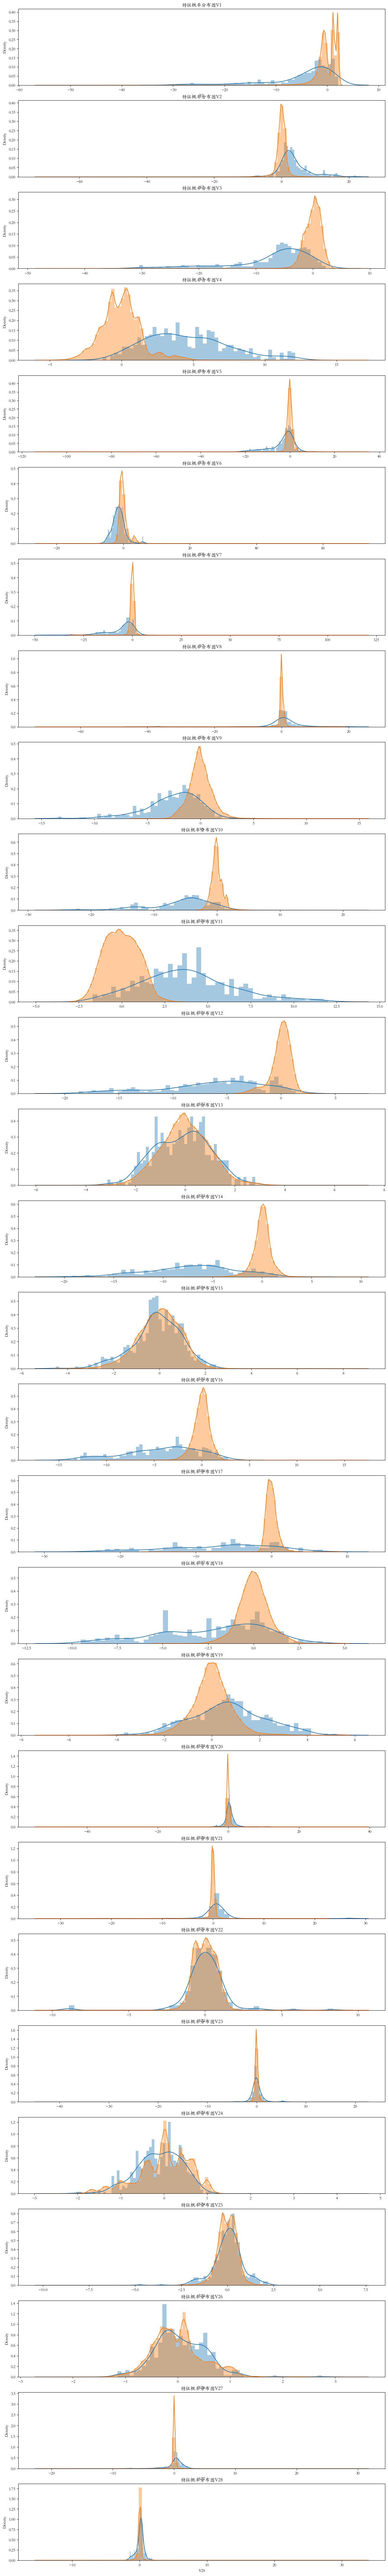

In [32]:
plt.rcParams['font.family'] = 'STKaiti'
v_feat = data.iloc[:,1:29].columns
plt.figure(figsize=(16,4 * 28))
cond1 = data['Class'] == 1
cond2 = data['Class'] == 0

# 子视图
gs = gridspec.GridSpec(28,1)
for i,cn in enumerate(v_feat):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][cond1],bins = 50) # 盗刷
    sns.distplot(data[cn][cond2],bins = 100) # 正常消费
    ax.set_title('特征概率分布图' + cn)

In [33]:
droplist = ['V8','V13','V15','V20','V21','V22','V23','V24',
            'V25','V26','V27','V28','Time']
data_new = data.drop(labels=droplist,axis = 1)
display(data.shape, data_new.shape)

(284807, 32)

(284807, 19)

In [34]:
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,149.6200,0,0.0000
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,2.6900,0,0.0000
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,378.6600,0,0.0000
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,123.5000,0,0.0000
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,69.9900,0,0.0000


In [35]:
col = ['Amount','Hour']
sc = StandardScaler()
data_new[col] = sc.fit_transform(data_new[col])
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,0.2450,0,-1.9603
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,-0.3425,0,-1.9603
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,1.1607,0,-1.9603
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,0.1405,0,-1.9603
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,-0.0734,0,-1.9603


In [36]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950
V10,284807.0000,0.0000,1.0888,-24.5883,-0.5354,-0.0929,0.4539,23.7451
V11,284807.0000,0.0000,1.0207,-4.7975,-0.7625,-0.0328,0.7396,12.0189


In [37]:
feture = list(data_new.columns)
feture.remove('Class') # 去除非特征列
X = data_new[feture]
y = data_new['Class']
display(X.head(),y.head())

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Hour
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.3638,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0.4040,0.2450,-1.9603
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,-0.2554,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,-0.1458,-0.3425,-1.9603
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,-1.5147,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,-2.2619,1.1607,-1.9603
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,-1.3870,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,-1.2326,0.1405,-1.9603
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,0.8177,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0.8035,-0.0734,-1.9603


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [38]:
clf = RandomForestClassifier()
clf.fit(X,y)
clf.feature_importances_

array([0.02000881, 0.01777976, 0.01740104, 0.03304773, 0.01951849,
       0.02235606, 0.03412903, 0.04712191, 0.0951882 , 0.05431066,
       0.14779513, 0.12181637, 0.09518088, 0.19544487, 0.0296072 ,
       0.01660785, 0.01656553, 0.01612049])

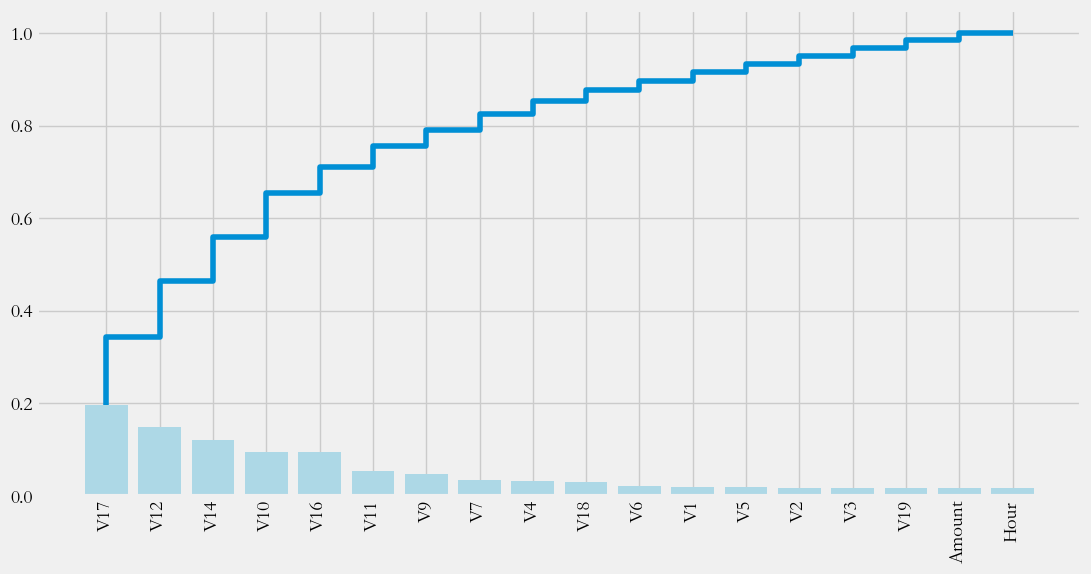

In [39]:
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')
 
importances = clf.feature_importances_
feat_name = feture
feat_name = np.array(feat_name)
index = np.argsort(importances)[::-1]
 
plt.bar(range(len(index)),importances[index],color = 'lightblue')
plt.step(range(18),np.cumsum(importances[index]))
_ = plt.xticks(range(18),labels=feat_name[index],rotation = 'vertical',
               fontsize = 14)

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
print('在过采样之前样本比例是：\n',y.value_counts())

在过采样之前样本比例是：
 Class
0    284315
1       492
Name: count, dtype: int64


In [43]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)
print('在过采样之后样本比例是：\n',y.value_counts())

在过采样之后样本比例是：
 Class
0    284315
1    284315
Name: count, dtype: int64


In [44]:
model = LogisticRegression()
model.fit(X,y)
y_ = model.predict(X)
print('准确率是：',accuracy_score(y,y_))

准确率是： 0.9379297610045196


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y,y_)
# print(cm)
recall = cm[1,1]/(cm[1,1] + cm[1,0])
print('召回率：',recall)

召回率： 0.9018236814800485


In [47]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

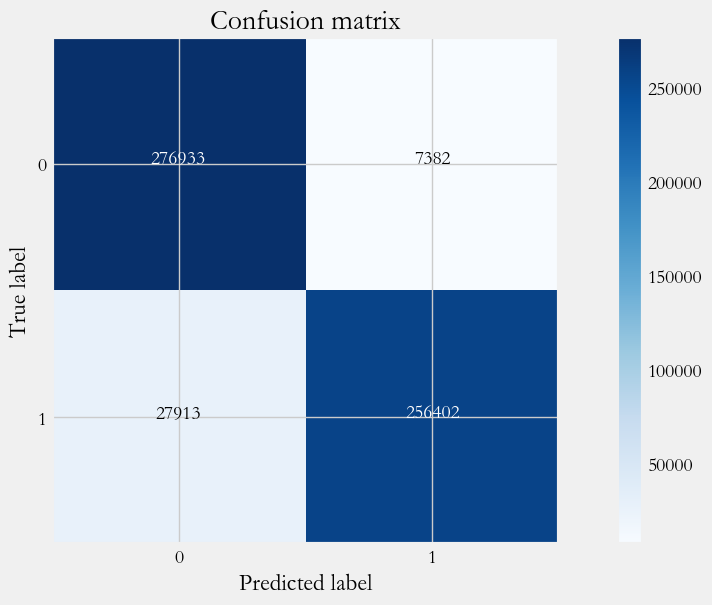

In [48]:
import itertools
plot_confusion_matrix(cm,classes=[0,1])

Text(0.5, 0, 'False Positive Rate')

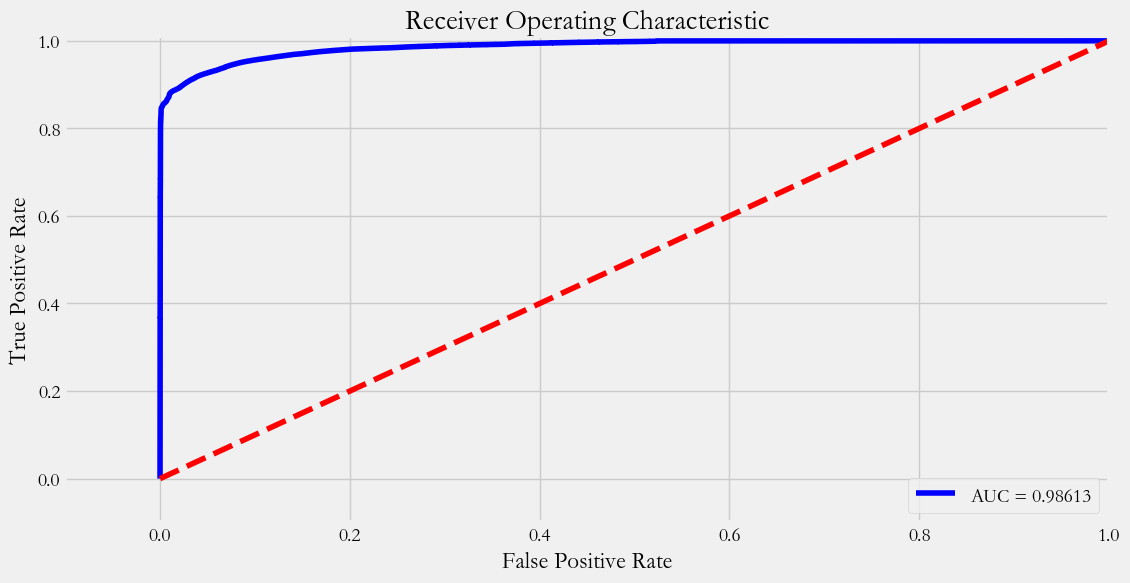

In [49]:
proba_ = model.predict_proba(X)[:,1]
fpr,tpr,thesholds_ = roc_curve(y,proba_)
roc_auc = auc(fpr,tpr)
 
# 绘制 ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [50]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
 
# 构建参数组合
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],'penalty': [ 'l1', 'l2']}
# 确定模型LogisticRegression，和参数组合param_grid ，cv指定10折
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=10) 
grid_search.fit(X_train, y_train)

CPU times: total: 2min 4s
Wall time: 37.3 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [51]:
results = pd.DataFrame(grid_search.cv_results_)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.93792


In [52]:
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

Test set accuracy score: 0.93761


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     56680
           1       0.97      0.90      0.94     57046

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



Recall metric in the testing dataset:  0.9015005434210988


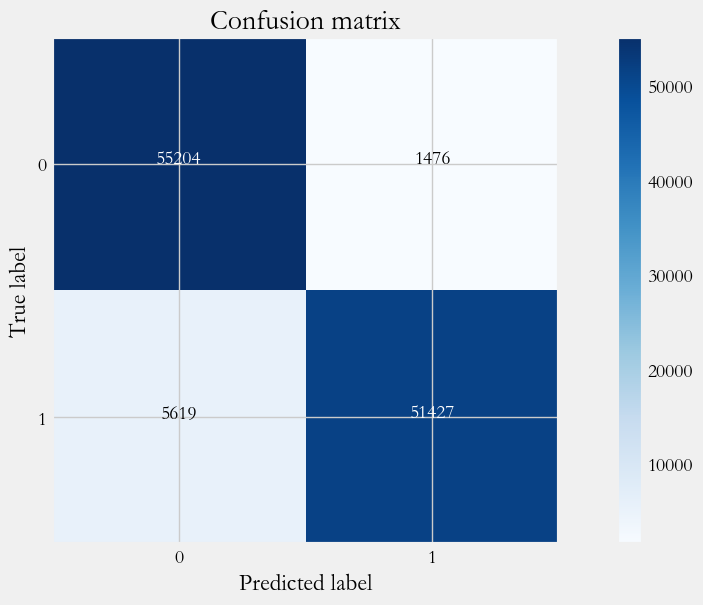

In [54]:
# 生成测试数据混淆矩阵
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ",     # 0.9353874982322161
      cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# 绘制模型优化后的混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=class_names,
                      title='Confusion matrix')

Recall metric in the testing dataset:  0.9017005785836133


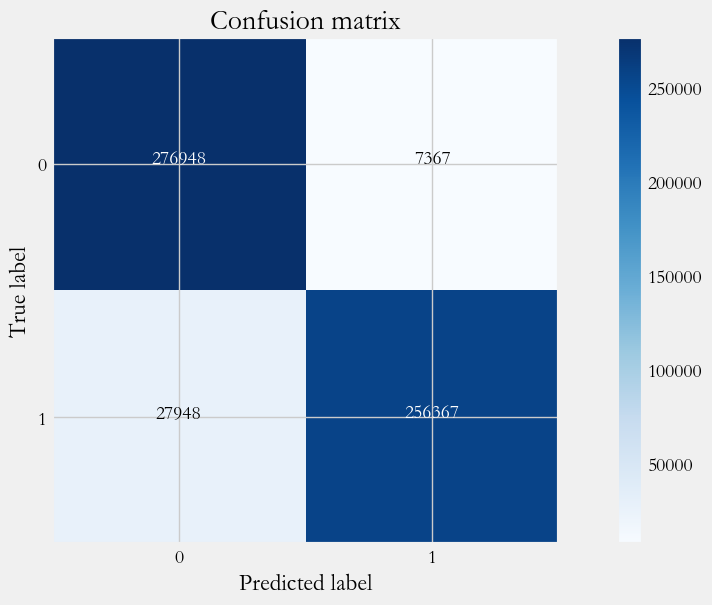

In [55]:
# 生成全部数据混淆矩阵
y_ = grid_search.predict(X) # 优化后的算法，最佳参数C：10，pentaly：l2
cnf_matrix = confusion_matrix(y, y_)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ",    # 0.9352865659567733
      cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# 绘制模型优化后的混淆矩阵
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=class_names,
                      title='Confusion matrix')